# Proyek Analisis Data: Bikes Dataset
- Nama: Amalan Fadil
- Email:amalanfadil@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana trend penggunaan rental sepeda  dari waktu ke waktu?
- Pertanyaan 2 : Apakah kondisi cuaca dapat mempengaruhi intensitas pengguna rental sepeda?
- Pertanyaan 3 : Bagaimana performa rental sepeda di tiap bulannya?
- Pertanyaan 4 : Bagaimana performa rental sepeda di tiap tanggalnya?
- Pertanyaan 5 : Pada hari apakah puncak penggunaan rental sepeda terjadi?
- Pertanyaan 6 : Bagaimana trend perbandingan pengguna biasa dan pengguna terdaftar?

## Menyaipkan semua library yang dibutuhkan

---



In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mengimport data dari Google Drive


In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

Mengambil dataset day.csv, Saya hanya mengambil dataset day.csv dikarenakan dataset day.csv sama dengan dataset umum dari dataset Bikes Dataset


In [166]:
day = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset.zip (Unzipped Files)/day.csv')
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek 5 data teratas


In [167]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Mengecek bentuk dataset


In [168]:
day.shape


(731, 16)

Mengecek statisik dari dataset

In [169]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Mengecek apakah ada data null/kosong pada dataset


In [170]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengecek apakah ada data duplikat di dalam dataset

In [171]:
day.duplicated().sum()

0

### Cleaning Data

Mengganti beberapa nama kolom dikarenakan awalnya nama kolom tersebut konteksnya tidak tertera jelas

In [172]:
day.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                       'weathersit':'weather_condition',
                       'hum':'humidity',
                       'mnth':'month',
                       'cnt':'total_count',
                       'yr':'year'},inplace=True)
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             731 non-null    int64  
 1   datetime           731 non-null    object 
 2   season             731 non-null    int64  
 3   year               731 non-null    int64  
 4   month              731 non-null    int64  
 5   is_holiday         731 non-null    int64  
 6   weekday            731 non-null    int64  
 7   is_workingday      731 non-null    int64  
 8   weather_condition  731 non-null    int64  
 9   temp               731 non-null    float64
 10  atemp              731 non-null    float64
 11  humidity           731 non-null    float64
 12  windspeed          731 non-null    float64
 13  casual             731 non-null    int64  
 14  registered         731 non-null    int64  
 15  total_count        731 non-null    int64  
dtypes: float64(4), int64(11), 

Mengecek unique value masing masing kolom

In [173]:
print('\nUnique Count :\n',day['season'].value_counts())
print('\nUnique Count :\n',day['year'].value_counts())
print('\nUnique Count :\n',day['month'].value_counts())
print('\nUnique Count :\n',day['is_holiday'].value_counts())
print('\nUnique Count :\n',day['weekday'].value_counts())
print('\nUnique Count :\n',day['is_workingday'].value_counts())
print('\nUnique Count :\n',day['weather_condition'].value_counts())


Unique Count :
 3    188
2    184
1    181
4    178
Name: season, dtype: int64

Unique Count :
 1    366
0    365
Name: year, dtype: int64

Unique Count :
 1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: month, dtype: int64

Unique Count :
 0    710
1     21
Name: is_holiday, dtype: int64

Unique Count :
 6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64

Unique Count :
 1    500
0    231
Name: is_workingday, dtype: int64

Unique Count :
 1    463
2    247
3     21
Name: weather_condition, dtype: int64


Mengganti nilai di kolom Season supaya konteksnya jelas

In [174]:
day['season'] = day['season'].astype(str)
day.loc[day['season'] == '1', 'season'] = 'Spring'
day.loc[day['season'] == '2', 'season'] = 'Summer'
day.loc[day['season'] == '3', 'season'] = 'Fall'
day.loc[day['season'] == '4', 'season'] = 'Winter'
print("Unique setelah cleaning: ", day['season'].unique())
day.head()

Unique setelah cleaning:  ['Spring' 'Summer' 'Fall' 'Winter']


,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah tipe data kolom 'datetime' menjadi datetime

In [175]:
day['datetime'] = pd.to_datetime(day['datetime'])
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             731 non-null    int64         
 1   datetime           731 non-null    datetime64[ns]
 2   season             731 non-null    object        
 3   year               731 non-null    int64         
 4   month              731 non-null    int64         
 5   is_holiday         731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   is_workingday      731 non-null    int64         
 8   weather_condition  731 non-null    int64         
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

Menambah kolom baru yaitu year, month, dan day


In [176]:
day['year'] = day['datetime'].dt.year
day['month'] = day['datetime'].dt.month
day['day'] = day['datetime'].dt.day
day.head()

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,day
0,1,2011-01-01,Spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02,Spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,2011-01-03,Spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,2011-01-04,Spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,2011-01-05,Spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


Mengganti nilai pada kolom 'weather_condition'


In [177]:
day['weather_condition'] = day['weather_condition'].astype(str)
day.loc[day['weather_condition'] == '1', 'weather_condition'] = 'Clear'
day.loc[day['weather_condition'] == '2', 'weather_condition'] = 'Mist'
day.loc[day['weather_condition'] == '3', 'weather_condition'] = 'Ligth Snow'
day.loc[day['weather_condition'] == '4', 'weather_condition'] = 'Heavy Rain'
print("Unique setelah cleaning: ", day['weather_condition'].unique())
day.head()

Unique setelah cleaning:  ['Mist' 'Clear' 'Ligth Snow']


,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,day
0,1,2011-01-01,Spring,2011,1,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02,Spring,2011,1,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


## Exploratory Data Analysis (EDA)

### Explore ...

Mengecek kembali data setelah dicleaning

In [178]:
day.describe()

,rec_id,year,month,is_holiday,weekday,is_workingday,temp,atemp,humidity,windspeed,casual,registered,total_count,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011.500684,6.519836,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.738714
std,211.165812,0.500342,3.451913,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.809949
min,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,183.500000,2011.000000,4.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,8.000000
50%,366.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,16.000000
75%,548.500000,2012.000000,10.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,23.000000
max,731.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,31.000000


In [179]:
day.head()

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,day
0,1,2011-01-01,Spring,2011,1,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,2011-01-02,Spring,2011,1,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


Melihat korelasi antara beberapa kolom di dataset

<ipython-input-180-14b215988d5d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(day.drop(['rec_id'], axis=1).corr())


<Axes: >

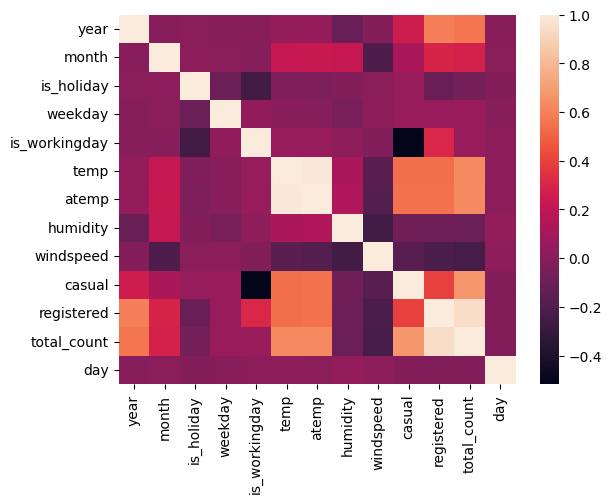

In [180]:
sns.heatmap(day.drop(['rec_id'], axis=1).corr())

<ipython-input-181-a86bdb59c21a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(day.drop(['rec_id', 'year','month'], axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")


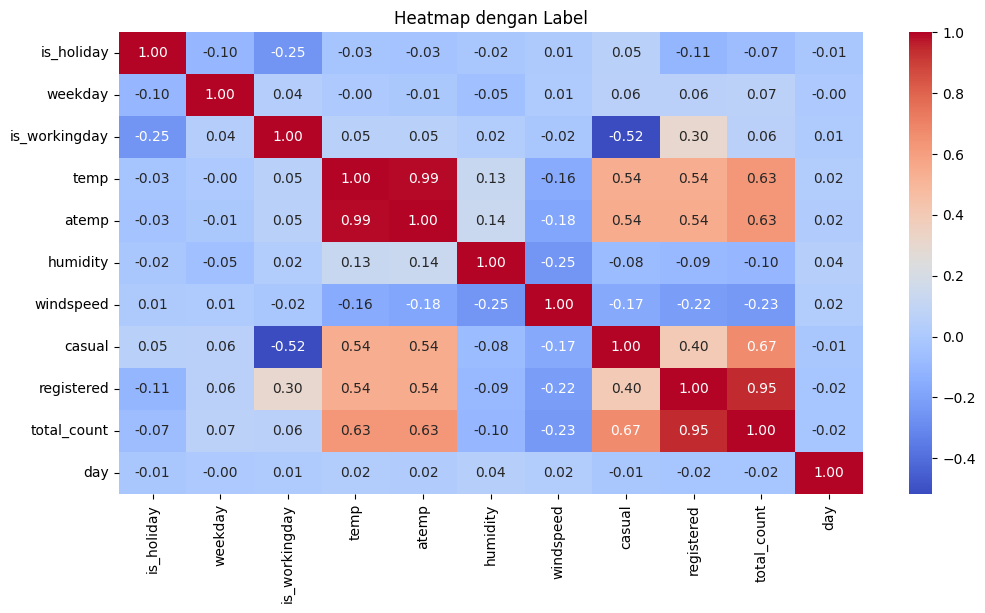

In [181]:
plt.figure(figsize=(12, 6))
sns.heatmap(day.drop(['rec_id', 'year','month'], axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap dengan Label')
plt.show()

Melihat jumlah perental sepeda di tiap Hari dalam 1 minggu

In [182]:
perhari = day.groupby(by='weekday').agg({
    'casual':['sum'],
    'registered':['sum']
})
perhari

,casual,registered
,sum,sum
weekday,,
0,140521,303506
1,70784,384719
2,57843,411266
3,57319,415729
4,61460,423935
5,78238,409552
6,153852,323955


Melihat jumlah perental sepeda di tiap tanggal

In [183]:
tanggal = day.groupby(by='day').agg({
    'casual':['sum'],
    'registered':['sum']
})
tanggal

,casual,registered
,sum,sum
day,,
1,18178,85514
2,19724,85657
3,22112,89449
4,24047,88288
5,20012,89103
6,19512,89088
7,19226,86260
8,19189,83581


Melihat total perental sepeda berdasarkan kondisi cuaca

In [184]:
cuaca = day.groupby(by='weather_condition').agg({
    'total_count':['sum']
})
cuaca

,total_count
,sum
weather_condition,
Clear,2257952
Ligth Snow,37869
Mist,996858


Melihat total perental sepeda per bulan

In [200]:
perbulan = day.groupby(by='month').agg({
    'total_count':['sum']
})


Melihat total perental sepeda berdasarkan trend tahunan dataset

In [186]:
day.groupby(by='datetime').agg({
    'total_count':['sum']
})

,total_count
,sum
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095


## Visualization & Explanatory Analysis

##Visualisasi 1

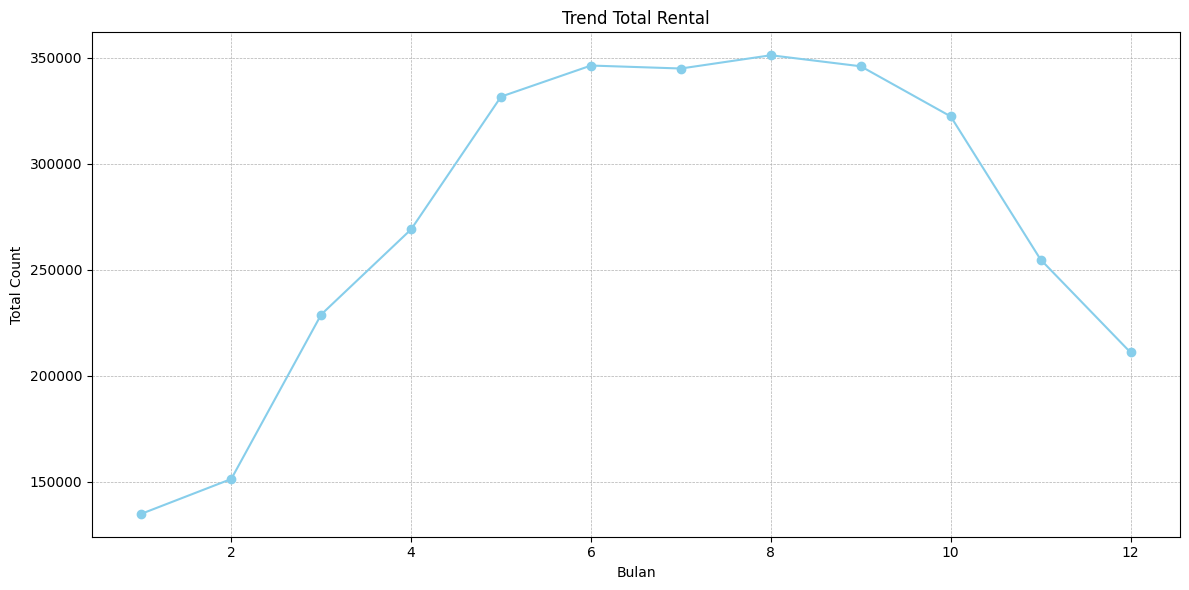

In [204]:
perbulan = day.groupby('month').agg({'total_count': 'sum'})
plt.figure(figsize=(12, 6))
plt.plot(perbulan.index, perbulan['total_count'], marker='o', linestyle='-', color='skyblue')
plt.xlabel('Bulan')
plt.ylabel('Total Count')
plt.title('Trend Total Rental')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Dari visualisasi diatas dapat dilihat bahwa Tren Rental Sepeda mengalami banyak peningkatan serta mengalami penurunan diantara bulan Juli 2011 s/d Januari 2012, serta mengalami penurunan juga pada bulan November 2012

## Visualisasi 2

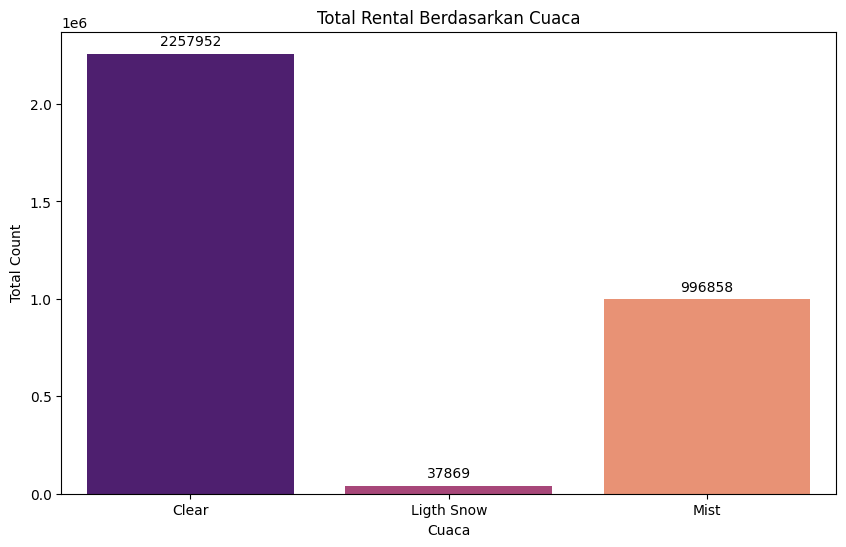

In [195]:
cuaca = day.groupby(by='weather_condition').agg({
    'total_count':['sum'],
}).reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='weather_condition', y=('total_count', 'sum'), data=cuaca, palette='magma')

plt.xlabel('Cuaca')
plt.ylabel('Total Count')
plt.title('Total Rental Berdasarkan Cuaca')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.xticks(rotation=0)
plt.show()

Dilihat dari visualisasi diatas terlihat bahwa Kondisi Cuaca juga mempengaruhi Intensitas perental sepeda

## Visualisasi 3

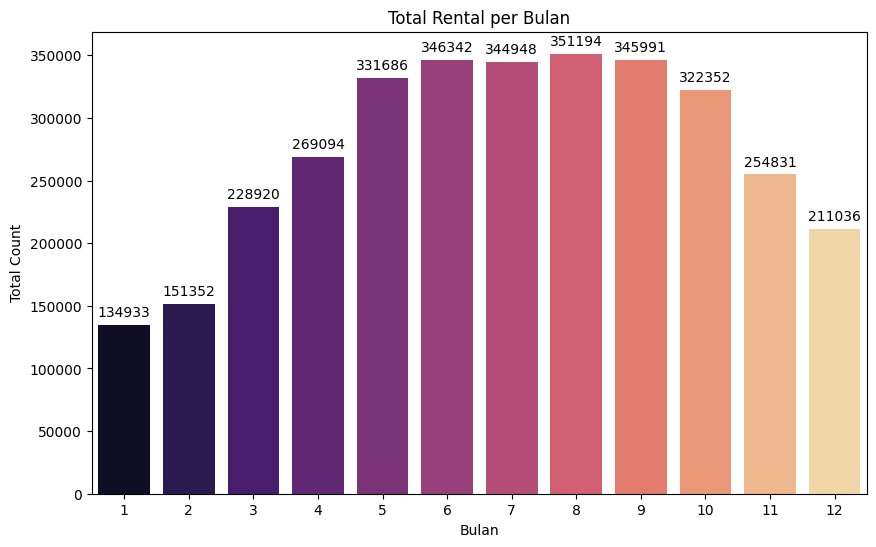

In [196]:
perbulan = day.groupby(by='month').agg({
    'total_count':['sum']
}).reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='month', y=('total_count', 'sum'), data=perbulan, palette='magma')

plt.xlabel('Bulan')
plt.ylabel('Total Count')
plt.title('Total Rental per Bulan')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.xticks(rotation=0)
plt.show()

 Dari visualisasi diatas, terlihat bahwa puncak keramaian Rental Sepeda berada di antara bulan Mei s/d Oktober berada di angka 300000 lebih

## Visualisasi 4

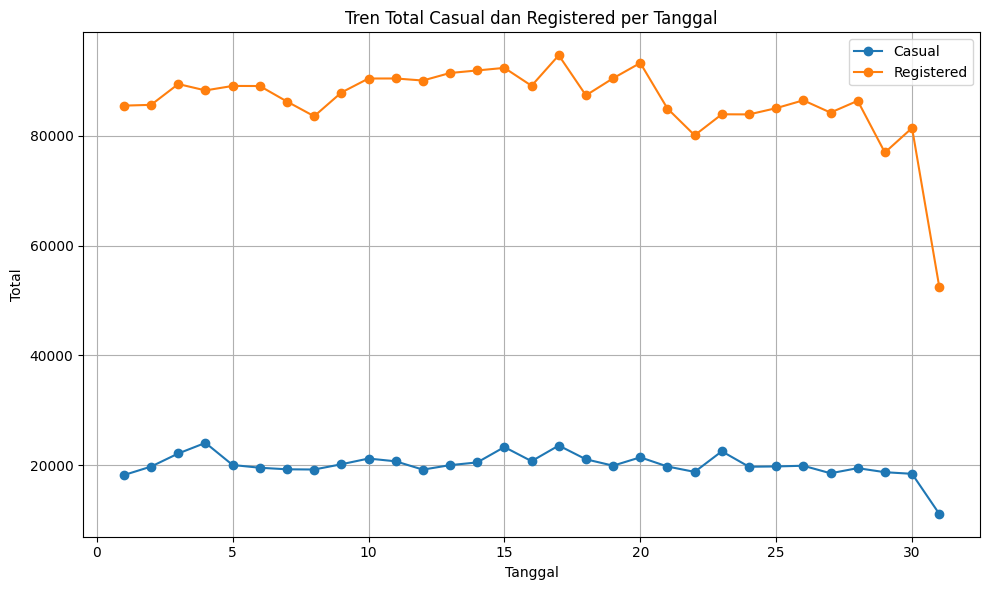

In [197]:
plt.figure(figsize=(10, 6))
plt.plot(tanggal.index, tanggal['casual'], label='Casual', marker='o')
plt.plot(tanggal.index, tanggal['registered'], label='Registered', marker='o')
plt.title('Tren Total Casual dan Registered per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Visualisasi diatas merupakan perbandingan jumlah pengguna rental sepeda di setiap tanggal yang diantaranya adalah pengguna biasa atau sudah menjadi menjadi member(registered),
Terlihat bahwa terdapat perbandingan yang jauh diantara pengguna biasa dan pengguna yang sudah terdaftar(registered)

## Visualisasi 5

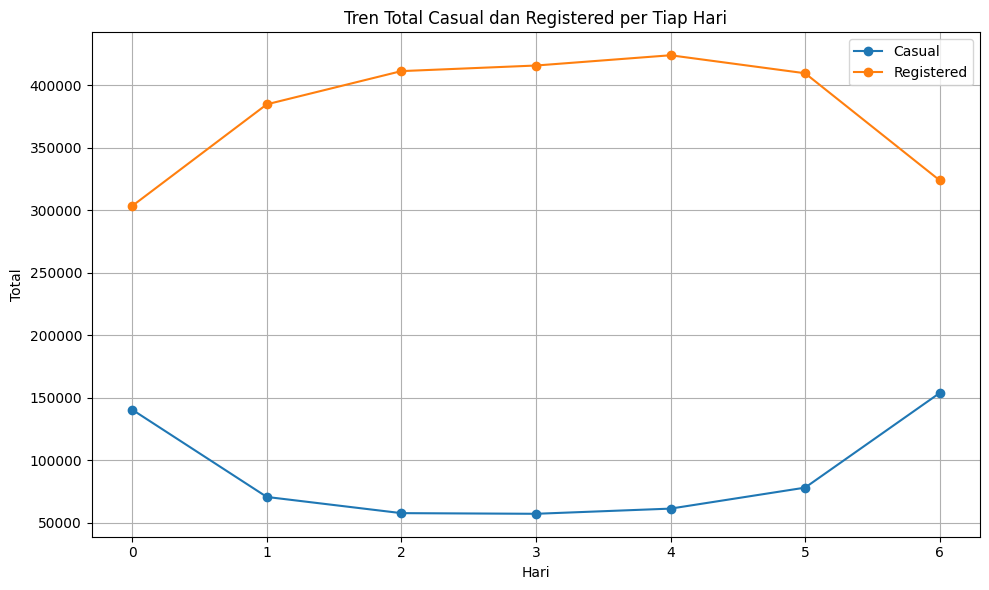

In [198]:
plt.figure(figsize=(10, 6))
plt.plot(perhari.index, perhari['casual'], label='Casual', marker='o')
plt.plot(perhari.index, perhari['registered'], label='Registered', marker='o')
plt.title('Tren Total Casual dan Registered per Tiap Hari')
plt.xlabel('Hari')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Dari visualisasi diatas dapat dilihat bahwa jumlah pengguna rental antara pengguna biasa dan member(registered) tertinggi jatuh pada hari sabtu dan minggu  

## Visualisasi 6

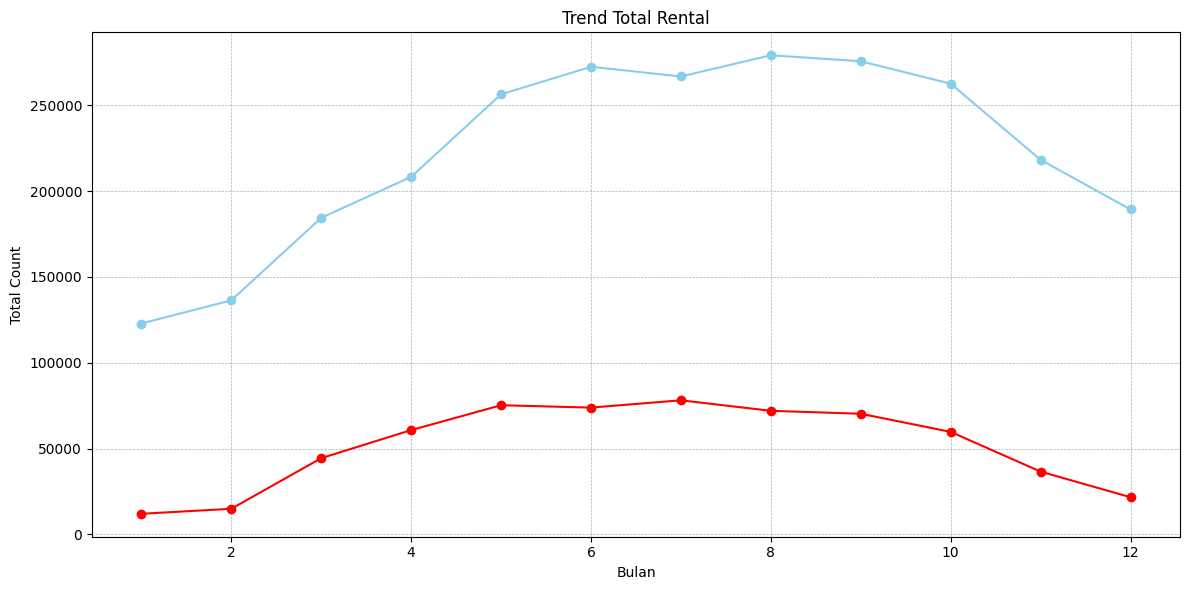

In [206]:
perbandingan = day.groupby('month').agg({'registered': 'sum', 'casual': 'sum'})
plt.figure(figsize=(12, 6))
plt.plot(perbandingan.index, perbandingan['casual'], label='Casual', marker='o', linestyle='-', color='red')
plt.plot(perbandingan.index, perbandingan['registered'], label='Registered', marker='o', linestyle='-', color='skyblue')
plt.xlabel('Bulan')
plt.ylabel('Total Count')
plt.title('Trend Total Rental')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Visualisasi diatas menunjukkan perbandingan jumlah para pengguna yang sudah mendaftar(registered) atau masih pengguna biasa(casual)

## Conclusion

##- Pertanyaan 1 : Bagaimana trend penggunaan rental sepeda  dari waktu ke waktu?
Dari visualisasi diatas dapat dilihat bahwa Tren Rental Sepeda mengalami banyak peningkatan serta mengalami penurunan diantara bulan Juli 2011 s/d Januari 2012, puncak peningkatan terjadi pada Oktober 2012 yang dimana pata bulan itu tren rental sepeda mencapai titik tertinggi dengan total kurang lebih 220000 unit rental sepeda, serta mengalami beberapa kali penurunan juga terutama pada bulan Januari 2012 yang dimana total unit rental sepeda berada dibawah 100000 unit




## - Pertanyaan 2 : Apakah kondisi cuaca dapat mempengaruhi intensitas pengguna rental sepeda?
Dilihat dari Visualisasi diatas terlihat bahwa Kondisi Cuaca juga dapat mempengaruhi Intensitas perental sepeda, dikarenakan para pesepeda juga lebih memilih bersepeda disaat cuacanya Clear agar tidak dapat menggangu jalan dan aktivitas bersepeda mereka, Mayoritas pesepeda memilih merental sepeda di saat cuacanya Clear & Mist dikarenakan kedua cuaca itu sangat aman untuk pesepeda.

## - Pertanyaan 3 : Bagaimana performa rental sepeda di tiap bulannya?
Dari visualisasi diatas, terlihat bahwa terjadi banyak peningkatan intensitas pengguna rental sepeda di awal hingga pertengahan tahun, puncak intensitas penggunaan Rental Sepeda berada di antara bulan Mei s/d Oktober berada di angka kurang lebih 300000 unit, serta intensitas rendah berada di awal tahun dan akhir tahun. Disarankan kedepannya agar dapat meningkatkan intensitas rental unit di awal & akhir tahun

## - Pertanyaan 4 : Bagaimana performa rental sepeda di tiap tanggalnya?
Visualisasi diatas merupakan perbandingan jumlah pengguna rental sepeda di setiap tanggal yang diantaranya adalah pengguna biasa atau sudah menjadi menjadi member(registered), Terlihat bahwa terdapat perbandingan yang jauh diantara pengguna biasa dan pengguna yang sudah terdaftar(registered), yang dimana pengguna terdaftar(registered) memiliki jumlah yang tinggi yaitu sekitaran 800000 dan pengguna biasa disekitaran 200000

## - Pertanyaan 5 : Pada hari apakah puncak penggunaan rental sepeda terjadi?
Kesimpulan yang bisa ditarik dari visualisasi diatas dapat dilihat bahwa jumlah pengguna rental antara pengguna biasa dan member(registered) tertinggi jatuh pada hari sabtu dan minggu untuk pelanggan biasa, berbanding terbalik dengan member yang dimana puncak tertinggi jatuh di hari biasa (weekday). Disarankan agar dapat menarik pengguna biasa menjadi member agar dapat meningkatkan intensitas penggunaan rental di weekend

## - Pertanyaan 6 : Bagaimana trend perbandingan pengguna biasa dan pengguna terdaftar?
Visualisasi diatas menunjukkan perbandingan jumlah para pengguna yang sudah mendaftar(registered) atau masih pengguna biasa(casual), seperti visualisasi diatas terdapat perbandingan jauh diantara pengguna biasa dan yang terdaftar dengan jumlah 100000 lebih untuk registered dan sekitaran 25000 untuk casual
